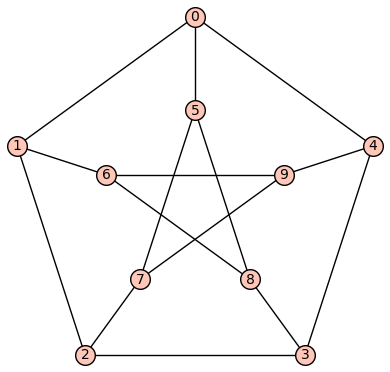

In [1]:
G = graphs.PetersenGraph()
G.show()

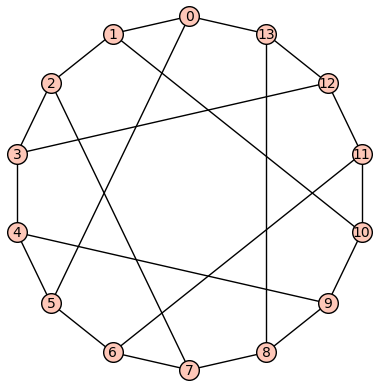

In [ ]:
G = graphs.HeawoodGraph()
G.show()

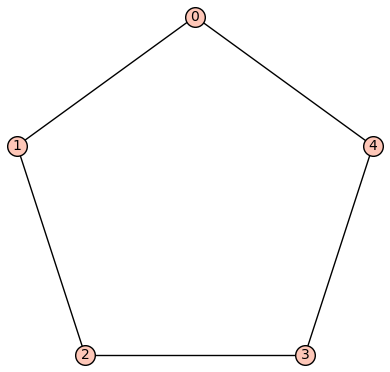

True

In [ ]:
G = graphs.CycleGraph(5)
G.show()
G.is_planar()

In [86]:
def is_outerplanar(G):
    """Funckija preveri, ali je graf G outerplanaren."""
    if not G.is_planar():
        return False
    
    K4 = graphs.CompleteGraph(4)
    K23 = graphs.CompleteBipartiteGraph(2, 3)

    for H in G.minor(induced=True):
        if H.is_isomorphic(K4) or H.is_isomorphic(K23):
            return False
        
    return True


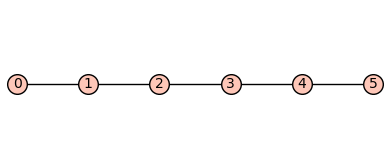

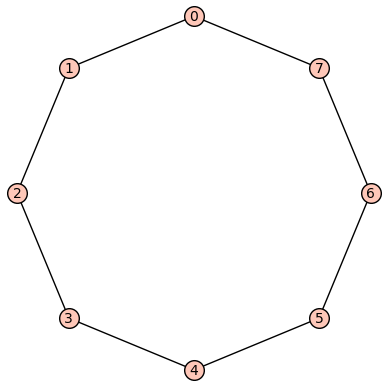

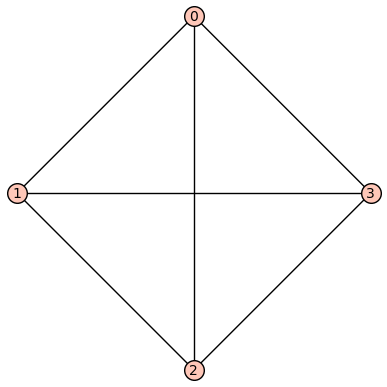

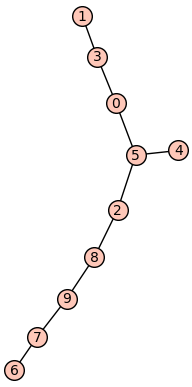

TypeError: Graph.minor() missing 1 required positional argument: 'H'

In [87]:
G1 = graphs.PathGraph(6)
G2 = graphs.CycleGraph(8)
G3 = graphs.CompleteGraph(4)
G4 = graphs.RandomTree(10)
G1.show()
G2.show()
G3.show()
G4.show()
print("G1", is_outerplanar(G1))
print("G2", is_outerplanar(G2))
print("G3", is_outerplanar(G3))
print("G4", is_outerplanar(G4))

In [1]:
def alpha_od(G):
    """
    Compute the size of the maximum odd independent set in the graph G.
    """
    from sage.numerical.mip import MixedIntegerLinearProgram
    
    n = G.order()
    V = G.vertices()
    
    # Create the mixed integer linear program
    mip = MixedIntegerLinearProgram(maximization=True)
    
    # Define variables
    x = mip.new_variable(binary=True) # Indicator if vertex v is in the independent set
    y = mip.new_variable(binary=True) # Indicator if vertex v has neighbors in the independent set
    z = mip.new_variable(integer=True) # Counter for the vertex v
    
    # Objective function
    mip.set_objective(mip.sum(x[v] for v in V))
    
    # Constraints
    for u, v in G.edges(labels=False):
        mip.add_constraint(x[u] + x[v] <= 1)
        
    for u in V:
        sum_neighbors = mip.sum(x[v] for v in G.neighbors(u))
        mip.add_constraint(sum_neighbors <= n * y[u])
        mip.add_constraint(y[u] + sum_neighbors == 2*z[u])
    
    # Solve the MIP
    return int(mip.solve())

Preverimo delovanje funkcije na manjših grafih.

In [2]:
from sage.all import Graph
from sage.graphs.graph_generators import graphs

P4 = graphs.PathGraph(4)
C4 = graphs.CycleGraph(4)
C5 = graphs.CycleGraph(5)

for name, G in [("P4", P4), ("C4", C4), ("C5", C5)]:
    print(name, "alpha_od =", alpha_od(G))

P4 alpha_od = 2
C4 alpha_od = 1
C5 alpha_od = 1


In [40]:
G = graphs.PathGraph(4)
hasattr(G, "has_minor")

False

In [44]:
G = Graph([(0,1),(1,2),(2,0)])
dir(G)            # seznam atributov/metod

['__add__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__pari__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_cycles_iterator_vertex',
 '_all_paths_iterator',
 '_all_simple_cycles_iterator_edge',
 '_ascii_art_',
 '_axiom_',
 '_axiom_init_',
 '_backend',
 '_bit_vector',
 '_build_flow_graph',
 '_cache_key',
 '_check_embedding_validity',
 '_check_pos_validity',
 '_check_weight_function',
 '_circle_embedding',
 '_color_by_label',
 '_copy_attribute_from',
 '_directed',
 '_ford_fulkerson',
 '_fricas_',
 '_fricas_init_',
 '_gap_',
 '_gap_init_',
 '_get_weight_function',
 '_giac_

In [65]:
g = graphs.PetersenGraph()
K5_minor = g.minor(graphs.CompleteGraph(5))
K5_minor
g.is_planar()

False

In [ ]:
from itertools import combinations

def is_outerplanar(G):
    """Funckija preveri, ali je graf G outerplanaren."""
    if not G.is_planar():
        return False

    K4 = graphs.CompleteGraph(4)
    K23 = graphs.CompleteBipartiteGraph(2, 3)

    V = G.vertices()

    for S in combinations(V, 4):
        if G.subgraph(S).is_isomorphic(K4):
            return False

    for S in combinations(V, 5):
        if G.subgraph(S).is_isomorphic(K23):
            return False

    return True

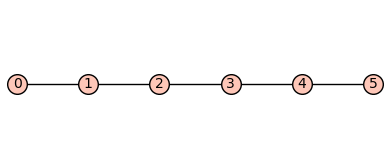

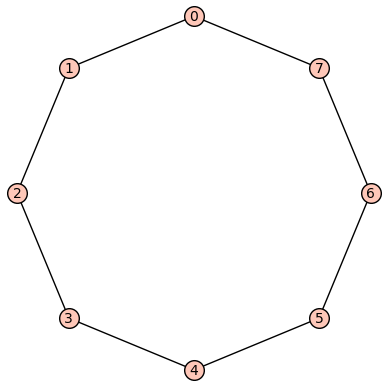

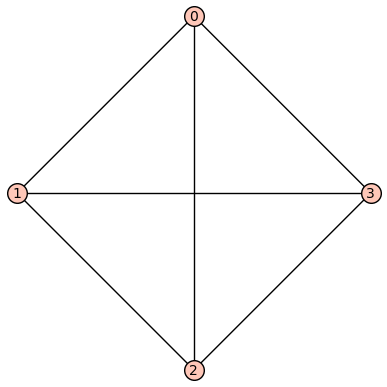

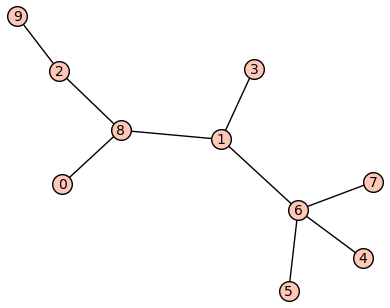

G1 True
G2 True
G3 False
G4 True


In [95]:
G1 = graphs.PathGraph(6)
G2 = graphs.CycleGraph(8)
G3 = graphs.CompleteGraph(4)
G4 = graphs.RandomTree(10)
G1.show()
G2.show()
G3.show()
G4.show()
print("G1", is_outerplanar(G1))
print("G2", is_outerplanar(G2))
print("G3", is_outerplanar(G3))
print("G4", is_outerplanar(G4))

In [84]:
def alpha_od(G):
    """
    Compute the size of the maximum odd independent set in the graph G.
    """
    from sage.numerical.mip import MixedIntegerLinearProgram
    
    n = G.order()
    V = G.vertices()
    
    # Create the mixed integer linear program
    mip = MixedIntegerLinearProgram(maximization=True)
    
    # Define variables
    x = mip.new_variable(binary=True) # Indicator if vertex v is in the independent set
    y = mip.new_variable(binary=True) # Indicator if vertex v has neighbors in the independent set
    z = mip.new_variable(integer=True) # Counter for the vertex v
    
    # Objective function
    mip.set_objective(mip.sum(x[v] for v in V))
    
    # Constraints
    for u, v in G.edges(labels=False):
        mip.add_constraint(x[u] + x[v] <= 1)
        
    for u in V:
        sum_neighbors = mip.sum(x[v] for v in G.neighbors(u))
        mip.add_constraint(sum_neighbors <= n * y[u])
        mip.add_constraint(y[u] + sum_neighbors == 2*z[u])
    
    # Solve the MIP
    return int(mip.solve())

In [85]:
from sage.all import Graph
from sage.graphs.graph_generators import graphs

P4 = graphs.PathGraph(4)
C4 = graphs.CycleGraph(4)
C5 = graphs.CycleGraph(5)

for name, G in [("P4", P4), ("C4", C4), ("C5", C5)]:
    print(name, "alpha_od =", alpha_od(G))

P4 alpha_od = 2
C4 alpha_od = 1
C5 alpha_od = 1
